**Day 1 - June 2 2022**

| Student                       | ID        |
| -------------                 |:---------:|
| Benjamin Starostka Jakobsen   | s184198   |
| Muhammad REDACTED             | REDACTED  |
| Victor REDACTED               | REDACTED  |

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import chi2

sns.set_style("white")

# Exercise 1
# Introduction and Generating Random Numbers

**In this exercise you should implement everything including the
tests (e.g. the chi-square and KS tests) yourself. Later, when your
code is working you are free to use builtin functions.**

## 1. Linear congruential generator (LCG)
**Write a program implementing a linear congruential generator
(LCG). Be sure that the program works correctly using only
integer representation.**

$$
x_i = mod(a x_{i-1}+c, M), \:\:\:\:\: U_i = \frac{x_i}{M}
$$

In the following sections the samples are the standardized $U_i$. 

In [ ]:
def lcg(N, a, c, M, x_0):
    numbers = []
    prev = x_0
    for _ in range(N):
        x_i = (a * prev + c) % M
        numbers += [x_i]
        prev = x_i
    return np.array(numbers) / M


lcg(20, 5, 1, 16, 3)

array([0.    , 0.0625, 0.375 , 0.9375, 0.75  , 0.8125, 0.125 , 0.6875,
       0.5   , 0.5625, 0.875 , 0.4375, 0.25  , 0.3125, 0.625 , 0.1875,
       0.    , 0.0625, 0.375 , 0.9375])

### (a)
**Generate 10.000 (pseudo-) random numbers and present
these numbers in a histogramme (e.g. 10 classes).**

In [ ]:
# Good parameters
N = 10000
a = 23  # multiplier
c = 3  # shift
M = 1033  # Modulus
x_0 = 5

classes = 10

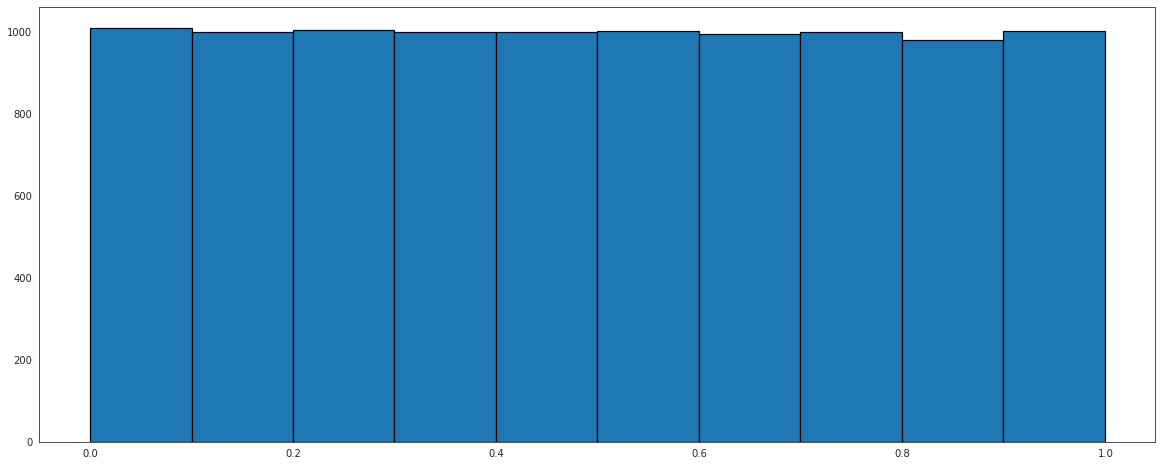

In [ ]:
u = lcg(N, a, c, M, x_0)
fig, ax = plt.subplots(1, figsize=(20, 8))
n, edges, _ = ax.hist(u, bins=10, edgecolor="black", linewidth=1.2)  # , bins=M

Equal bin height indicates parameters results in a good generator for a uniform sample set.
Moreover, we expect from a good generator of uniformly generated number that any subset of numbers in [0,1] is also uniformly generated.

### (b) 
**Evaluate the quality of the generator by graphical descriptive statistics (histogrammes, scatter plots) and statistical tests - $\chi^2$, Kolmogorov-Smirnov (KS), run-tests, and correlation test.**

In [ ]:
values, counts = np.unique(u, return_counts=True)
cycle_length = len(values)
cycle_length

1032

This LCG has a cycle length of 1032. Knowing that $M=1033$, this is nearly the maximum cycle length!

#### Visual test: scatter plot

In [ ]:
# Scatter plots


def vistest(u):
    fig, ax = plt.subplots(figsize=(7, 7))
    u_curr = u[1:]
    u_prev = u[:-1]
    ax.scatter(u_prev, u_curr)
    ax.set(
        title=r"Scatter plot of $U_{i-1}$ against $U_{i}$" + f" (a={a}, c={c}, M={M})",
        xlabel=r"$U_{i-1}$",
        ylabel=r"$U_{i}$",
    )
    plt.show()

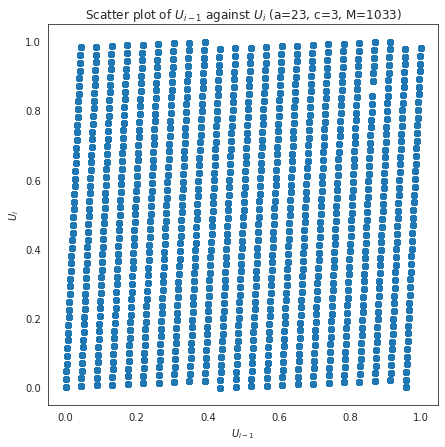

In [ ]:
vistest(u)

A pattern indicates some level of correlation between the samples. 

Here we can first see that the values taken by the samples seem to cover quite fully the interval [0,1].
The pattern observed are multiple steep, nearly vertical, lines. It means that, given two very close values $u_1$ and $u_2$, generating for each their next sample with the LCG gives vastly different numbers. 

### $\chi^2$-test

In [ ]:
def chi_squared(n, N, classes):
    n_expected = N / classes
    T = 0
    for i in range(classes):
        temp = (n[i] - n_expected) ** 2 / n_expected
        T += temp
    return T

In [ ]:
chi_test = chi_squared(n, N, classes)
chi_test

0.502

In [ ]:
def plt_chi_squared(chi_test, classes=classes):
    df = (
        classes - 1 - 0
    )  # Degrees of freedom = nclasses − 1 − the number of estimated parameters.
    x_coord = np.linspace(0, chi_test + 30, num=10000)
    y = chi2.pdf(x_coord, df)
    fig, ax = plt.subplots(figsize=(15, 8))
    plt.plot(x_coord, y)
    plt.vlines(x=chi_test, ymin=0, ymax=0.1, color="green", label="T")
    # plt.vlines(x=chi2.ppf(0.95,df), ymin=0, ymax=0.1, color='red', label='T_critical')
    ax.fill_between(
        x_coord,
        0,
        y,
        where=x_coord >= chi2.ppf(0.95, df),
        facecolor="red",
        alpha=0.3,
        interpolate=True,
        label="critical region",
    )
    ax.legend()
    plt.show()

    p_value = 1 - chi2.cdf(chi_test, df)
    print("T = ", chi_test)
    print("p value =", p_value)
    print("T critical", chi2.ppf(0.95, df))

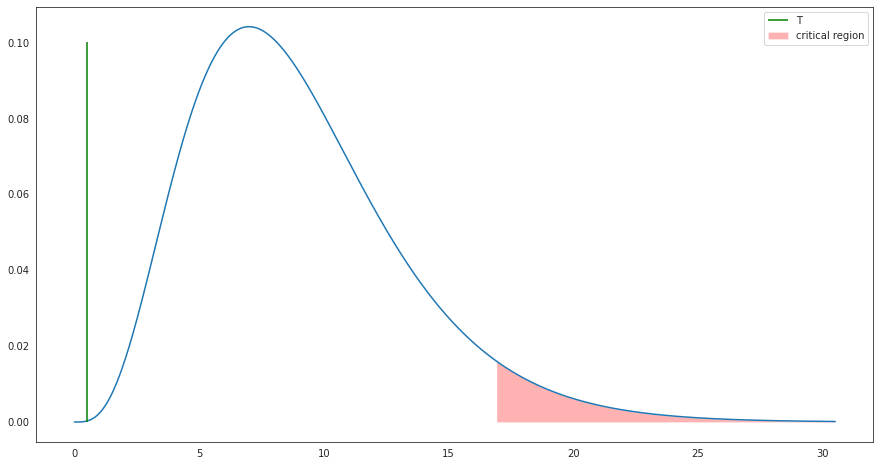

T =  0.502
p value = 0.9999690397640574
T critical 16.918977604620448


In [ ]:
plt_chi_squared(chi_test, classes)

**Null-Hypothesis** Generated samples follows a uniform distribution

Given a 95% confidence interval, a p-value of more than 5% (i.e. a statistic $T$ lower than $T_{critical}$) indicates that evidence of the alternate hypothesis is weak and we can therefore not reject the null hypothesis.

### Kolmogorov-Smirnov test

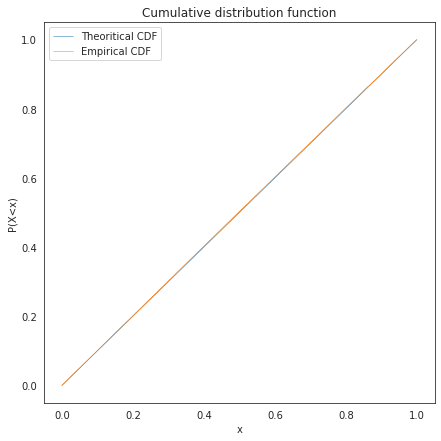

In [ ]:
u_sort = np.sort(u)
x = np.arange(0, N) / N
y = np.arange(0, N) / N
fig, ax = plt.subplots(1, figsize=(7, 7))
ax.plot(x, y, linewidth=0.5, label="Theoritical CDF")
ax.step(u_sort, y, linewidth=0.5, label="Empirical CDF")
ax.set(xlabel="x", ylabel="P(X<x)", title="Cumulative distribution function")
ax.legend()

plt.show()

In [ ]:
def ks_test(u):
    # assuming uniform distribution
    u_sort = np.sort(u)
    D = 0
    for i, u_i in enumerate(u_sort):
        d = abs((i / len(u_sort)) - u_i)
        D = max(D, d)
    print(D)
    return D

In [ ]:
# adjusted statistic:
# All parameters known of the uniform distribution (a=0,b=1)
adj_D = (np.sqrt(N) + 0.12 + (0.11 / np.sqrt(N))) * ks_test(u)
print("Adjusted D statistic:", adj_D)

0.003296515004840239
Adjusted D statistic: 0.33005070845111006


With a significance level of $\alpha=0.05$,   $T_{crit}$ is equal to 1.358.

Here, the statistic D is lower than $T_{crit}$, so we cannot reject the null hypothesis.

### Run test I : Above/Below

A single run is counted as a collection of samples above or below the median. This is counted for above and below the median respectively.

In [ ]:
def above_below_test(u):
    median = np.median(u)
    R_a = 0
    R_b = 0

    for i, val in enumerate(u[1:]):
        if u[i] > median:
            if u[i - 1] > median:
                continue
            else:
                R_b += 1
        else:
            if u[i - 1] <= median:
                continue
            else:
                R_a += 1
    print("The total number of runs:", R_a + R_b)
    return (R_a + R_b), R_a, R_b

In [ ]:
def plt_above_below_test(u, N):
    T, _, _ = above_below_test(u)  # run test

    n1 = N / 2  # number of samples above median, so by definition it is half of them!
    n2 = N - n1
    mu = 2 * n1 * n2 / (n1 + n2)
    sigma = 2 * n1 * n2 * (2 * n1 * n2 - n1 - n2) / ((n1 + n2) ** 2 * (n1 + n2 - 1))

    from scipy.stats import norm

    x = np.linspace(
        norm.ppf(0.01, loc=mu, scale=sigma), norm.ppf(0.99, loc=mu, scale=sigma), 100
    )
    y = norm.pdf(x, loc=mu, scale=sigma)
    fig, ax = plt.subplots()
    ax.plot(x, y, "-", lw=5, alpha=0.6, label="norm pdf")
    ax.fill_between(
        x,
        0,
        y,
        where=x >= norm.ppf(0.975, loc=mu, scale=sigma),
        facecolor="red",
        alpha=0.3,
        interpolate=True,
        label="critical region",
    )
    ax.fill_between(
        x,
        0,
        y,
        where=x <= norm.ppf(0.025, loc=mu, scale=sigma),
        facecolor="red",
        alpha=0.3,
        interpolate=True,
    )
    plt.vlines(x=T, ymin=0, ymax=max(y), color="green", label="T")
    plt.legend()
    print("Area to the right of the green line:", 1 - norm.cdf(T, loc=mu, scale=sigma))

The total number of runs: 4812
Area to the right of the green line: 0.5299751999947845


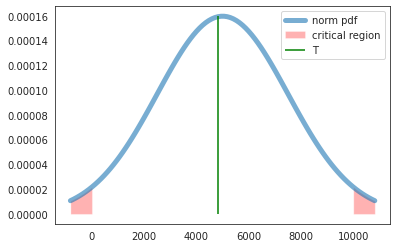

In [ ]:
plt_above_below_test(u, N)

The number of runs (above/below the median) is (asymptotically) distributed as
$$
T = R_a + T_b \sim N(\frac{2n_1n_2}{n_1+n_2}+1, \frac{2n_1n_2(2n_1n_2-n_1-n_2)}{(n_1+n_2)^2(n_1+n_2-1)})
$$
where $n_1$ is the number of samples above and $n_2$ is the number below. Here, by using the median, $n_1= N/2$ by definition (half of the samples are above the median).

We then compare our actual number of runs $T$ to the normal distribution. The test is designed with $\alpha=0.05$. We expect reject $T$ 5% of the time if it were to follow that distribution if it is in the critical region (defined by the centiles 2.5 and 97.5).

Here, $T$ falls in the middle of the normal distribution, thus the null hypothesis is not rejected, i.e. the test does not disprove that the random numbers do not follow a uniform distribution. 

### Run test II : Up/Down

In [ ]:
def up_down_test(u):
    run_lengths = []
    current_length = 1
    for i, val in enumerate(u[1:]):
        if u[i] >= u[i - 1]:
            current_length += 1
        else:
            run_lengths += [current_length]
            current_length = 1
    print("Run lengths:", np.array(run_lengths))
    return run_lengths

In [ ]:
def compute_R(run_lengths):

    values, counts = np.unique(run_lengths, return_counts=True)
    R = np.zeros((6,))
    for i, r in enumerate(counts):
        if i >= 6:
            R[-1] += counts[i]
        else:
            R[i] = counts[i]

    print(values)
    print(counts)
    print(R)

    return R

In [ ]:
def compute_Z(R):
    A = np.array(
        [
            [4529.4, 9044.9, 13568, 18091, 22615, 27892],
            [9044.9, 18097, 27139, 36187, 45234, 55789],
            [13568, 27139, 40721, 54281, 67852, 83685],
            [18091, 36187, 54281, 72414, 90470, 111580],
            [22615, 45234, 67852, 90470, 113262, 139476],
            [27892, 55789, 83685, 111580, 139476, 172860],
        ]
    )

    B = np.array([1 / 6, 5 / 24, 11 / 120, 19 / 720, 29 / 5040, 1 / 840])

    tmp = R - N * B
    Z = 1 / (N - 6) * np.dot(tmp.T, np.dot(A, tmp))
    print(Z)
    return Z

In [ ]:
def plt_up_down_test(Z):
    df = 6  # Degrees of freedom = nclasses − 1 − the number of estimated parameters.
    x_coord = np.linspace(0, Z + 30, num=10000)
    y = chi2.pdf(x_coord, df)
    fig, ax = plt.subplots(figsize=(15, 8))
    plt.plot(x_coord, y)
    plt.vlines(x=Z, ymin=0, ymax=0.1, color="green", label="T")
    # plt.vlines(x=chi2.ppf(0.95,df), ymin=0, ymax=0.1, color='red', label='T_critical')
    ax.fill_between(
        x_coord,
        0,
        y,
        where=x_coord >= chi2.ppf(0.95, df),
        facecolor="red",
        alpha=0.3,
        interpolate=True,
        label="critical region",
    )
    ax.legend()
    plt.show()

    p_value = 1 - chi2.cdf(Z, df)
    print("Z = ", Z)
    print("p value =", p_value)
    print("T critical", chi2.ppf(0.95, df))

Run lengths: [1 2 1 ... 1 4 2]
[1 2 3 4 5 6 7]
[1736 2051  844  252   87   19   10]
[1736. 2051.  844.  252.   87.   29.]
80.27072216622643
Z test statistic: 80.27072216622643


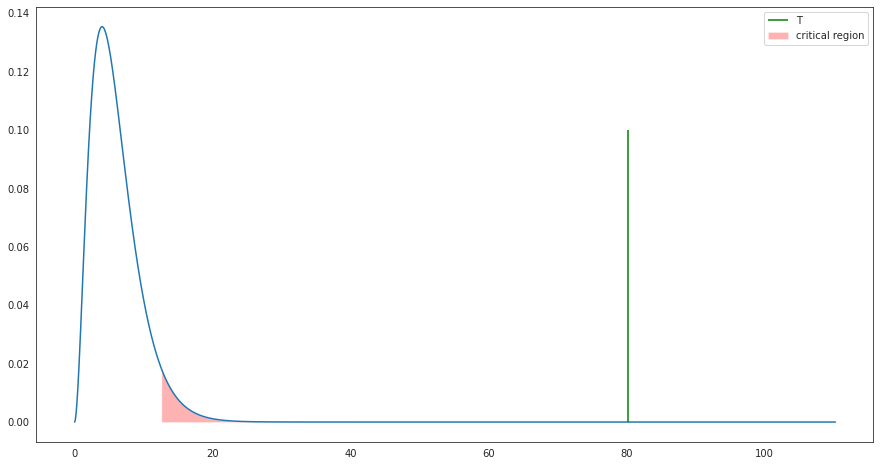

Z =  80.27072216622643
p value = 3.1086244689504383e-15
T critical 12.591587243743977


In [ ]:
run_lengths = up_down_test(u)
R = compute_R(run_lengths)
Z = compute_Z(R)
print("Z test statistic:", Z)

plt_up_down_test(Z)

$$
Z \sim \chi^2(6) 
$$

With a significance level of $\alpha=0.05$ we get a very small p-value and the test statistic is in the critical region. Therefore we reject the null hypothesis that the RNG generates independent numbers. 

It shows that our LCG generates way more consecutively increasing numbers than you would expect from a truly random generator.

### Correlation test

In [ ]:
def corr_test(u):
    h = 1
    c_h = 0
    for i, _ in enumerate(u[:-h]):
        c_h += u[i] * u[i + h]
    c_h = 1 / (N - h) * c_h
    print(c_h)
    return c_h

In [ ]:
def plt_corr_test(c_h, N):
    mu = 0.25
    sigma = 7 / (144 * N)

    from scipy.stats import norm

    x = np.linspace(
        norm.ppf(0.01, loc=mu, scale=sigma), norm.ppf(0.99, loc=mu, scale=sigma), 100
    )
    y = norm.pdf(x, loc=mu, scale=sigma)
    fig, ax = plt.subplots(figsize=(30, 5))
    ax.plot(x, y, "-", lw=5, alpha=0.6, label="norm pdf")
    ax.fill_between(
        x,
        0,
        y,
        where=x >= norm.ppf(0.975, loc=mu, scale=sigma),
        facecolor="red",
        alpha=0.3,
        interpolate=True,
        label="critical region",
    )
    ax.fill_between(
        x,
        0,
        y,
        where=x <= norm.ppf(0.025, loc=mu, scale=sigma),
        facecolor="red",
        alpha=0.3,
        interpolate=True,
    )
    plt.vlines(x=c_h, ymin=0, ymax=max(y), color="green", label="T")
    plt.legend()
    print(
        "Area to the right of the green line:", 1 - norm.cdf(c_h, loc=mu, scale=sigma)
    )

0.25190007532637637
Area to the right of the green line: 0.0


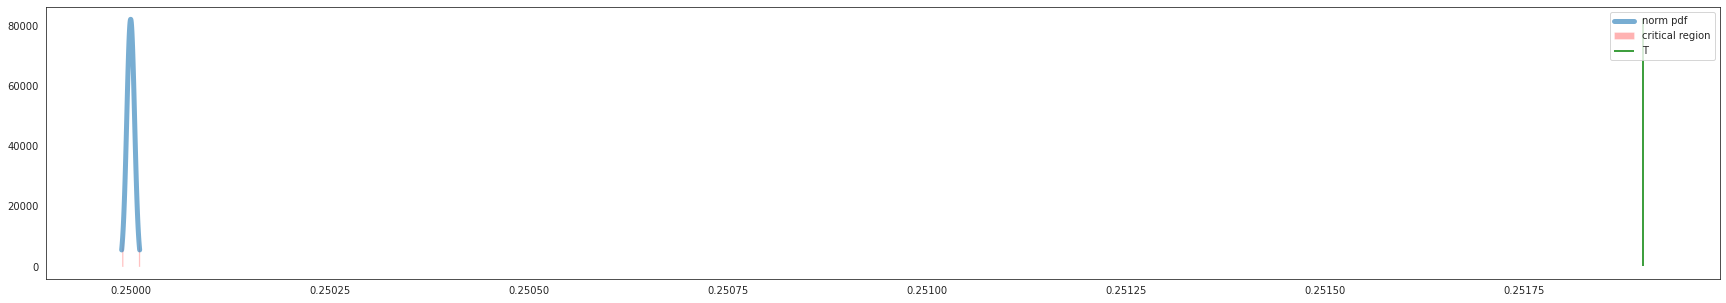

In [ ]:
c_h = corr_test(u)
plt_corr_test(c_h, N)

$$
c = \frac{1}{n-1} \sum_{i=1}^{n-1} U_{i}U_{i-1} \sim N(0.25, \frac{7}{144n})
$$

Our generator fails the correlation test.

### (c)
**Repeat (a) and (b) by experimenting with different values
of “a”, “b” and “M”. In the end you should have a decent
generator. Report at least one bad and your final choice.**

In [ ]:
# Bad choice??
N = 10000
a = 23  # multiplier
c = 3  # shift
M = 1000  # Modulus
x_0 = 5

## 2. System generator
**Apply a system available generator and perform the various
statistical tests you did under Part 1 point (b) for this
generator too.**

In [ ]:
np.random.seed(0)
u = np.random.uniform(size=10000)

### Visual test

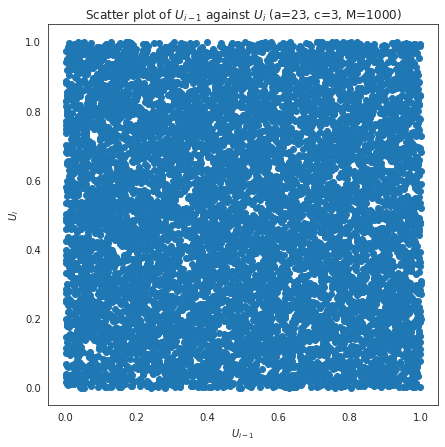

In [ ]:
vistest(u)

There is no pattern indicating that the samples are uniform with no correlation.

### $\chi^2$-test

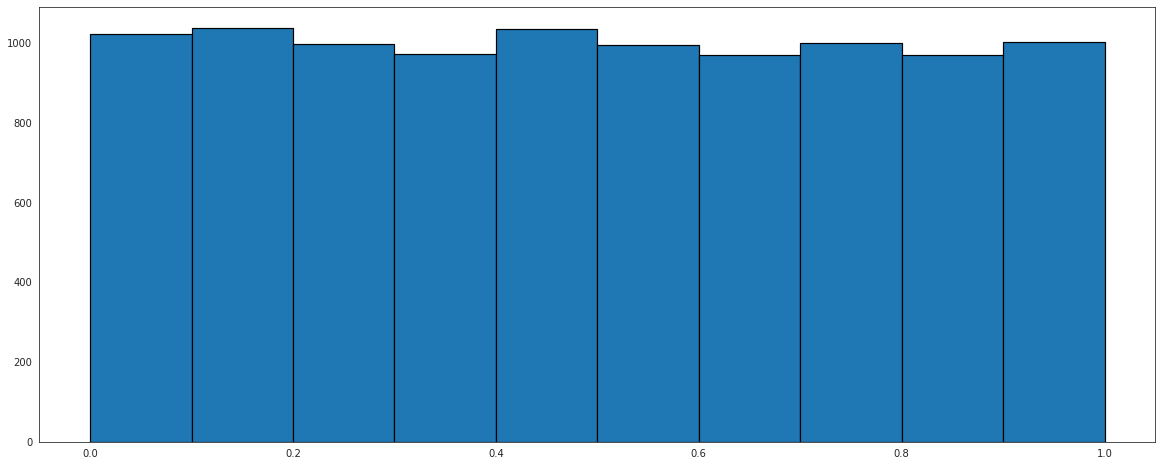

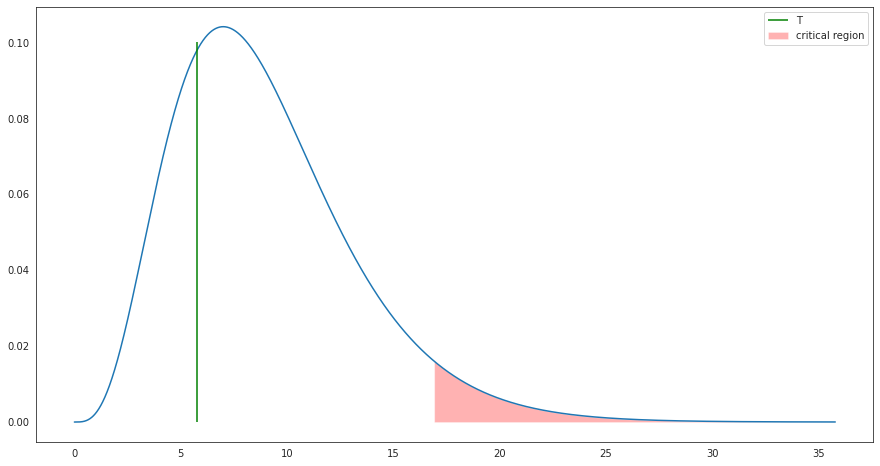

T =  5.7860000000000005
p value = 0.7611305640227969
T critical 16.918977604620448


In [ ]:
fig, ax = plt.subplots(1, figsize=(20, 8))
n, edges, _ = ax.hist(u, bins=10, edgecolor="black", linewidth=1.2)  # , bins=M

chi_test = chi_squared(n, N, classes)

plt_chi_squared(chi_test, classes)

We see a $T$ value less than $T_{critical}$ and a high p-value which means we cannot reject the null hypothesis. 

### Kolmogorov-Smirnov test

In [ ]:
ks_test(u)

# adjusted statistic:
# All parameters known of the uniform distribution (a=0,b=1)
adj_D = (np.sqrt(N) + 0.12 + (0.11 / np.sqrt(N))) * ks_test(u)
print("Adjusted D statistic:", adj_D)

0.00803627573814547
0.00803627573814547
Adjusted D statistic: 0.8046007668064364


With a significance level of $\alpha=0.05$,   $T_{crit}$ is equal to 1.358.

Here, the statistic D is lower than $T_{crit}$, so we cannot reject the null hypothesis.

### Above below test

The total number of runs: 5081
Area to the right of the green line: 0.4870752390915526


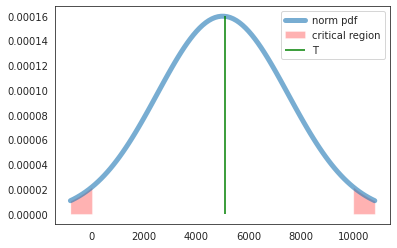

In [ ]:
plt_above_below_test(u, N)

### Up down test

In [ ]:
run_lengths = up_down_test(u)
R = compute_R(run_lengths)
Z = compute_Z(R)
print("Z test statistic:", Z)

Run lengths: [1 2 1 ... 3 1 2]
[1 2 3 4 5 6 8]
[1665 2108  898  270   54   11    1]
[1665. 2108.  898.  270.   54.   12.]
1.5218989040185815
Z test statistic: 1.5218989040185815


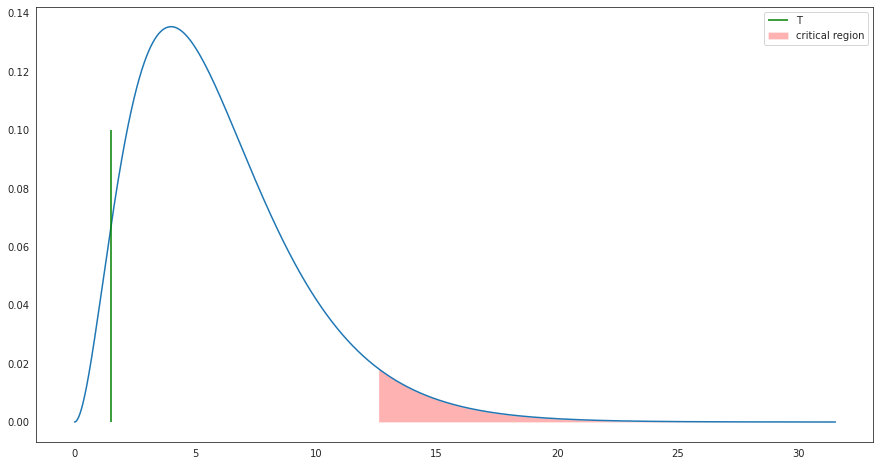

Z =  1.5218989040185815
p value = 0.9580266414004257
T critical 12.591587243743977


In [ ]:
plt_up_down_test(Z)

### Correlation test

0.24555357057352808
Area to the right of the green line: 1.0


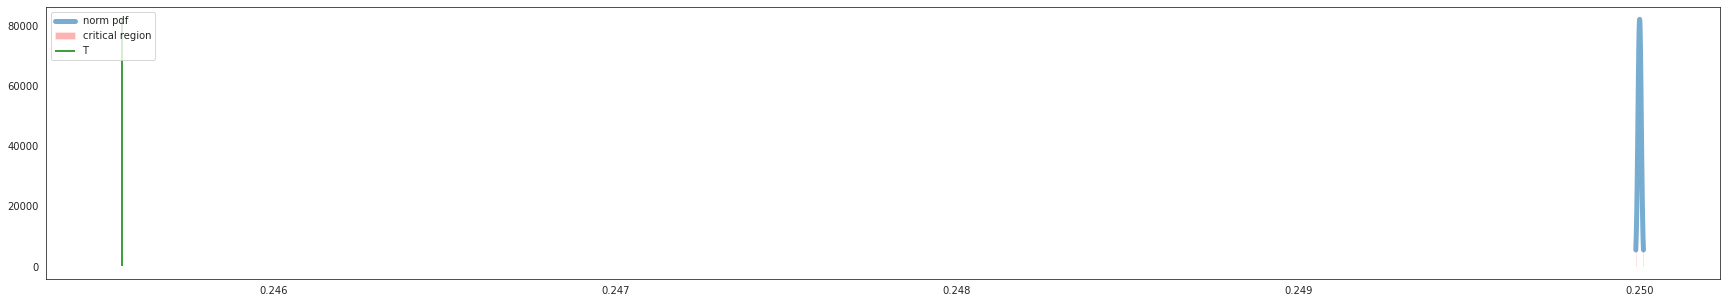

In [ ]:
c_h = corr_test(u)
plt_corr_test(c_h, N)

## 3. Discussion for single sample
**You were asked to simulate one sample and perform tests on
this sample. Discuss the sufficiency of this approach and take
action, if needed.**

During this notebook, our distributions are simulated based on a single run of the uniform distribution. Those runs vary in quality (i.e., uniformity based on parameters) and therefore it would be beneficial to do multiple runs and subsample from them to improve consistency.